In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

In [2]:
offc = pd.read_csv('data/toy.officer_data.csv',sep=',')
cmpl = pd.read_csv('data/toy.complaint_data.csv', sep=',')

In [3]:
offc.head()

,first.name,last.name,appointed.date,race,gender,birth.year,age,rank,primary,secondary,tertiary,officer_id
0,KARINA,AARON,2005-09-26,HISPANIC,FEMALE,1980,35,POLICE OFFICER,0,1,0,1139
1,AZIZ,ABDELMAJEID,2008-04-28,A_OTHER,MALE,1984,31,POLICE OFFICER,0,0,1,434
2,JENNIFER,ACCARDO,2004-11-29,WHITE,FEMALE,1979,37,POLICE OFFICER,0,0,1,2515
3,ROSEMARY,ACCARDO,1986-08-11,WHITE,FEMALE,1952,63,POLICE OFFICER,0,0,1,1149
4,THOMAS,ACCARDO,2001-04-30,WHITE,MALE,1967,49,POLICE OFFICER,0,1,0,2134


In [4]:
cmpl.head()

,crid,incident_date,beat_2012_geocoded,complaintcategory,finalfinding,officer_id
0,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,1
1,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,2
2,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,3
3,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,4
4,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,5


In [5]:
X = offc
X = X.drop(X.columns[[0,1,5,7,11]], axis=1)
X[X.columns[0]] = X[X.columns[0]].astype(str).str[0:4].astype(int)

In [6]:
X_cat = X[X.columns[[1,2]]]
Y=X_cat.apply(LabelEncoder().fit_transform)

In [7]:
X[X.columns[[1,2]]] = Y
np.where(np.isnan(X))
X.iat[np.where(np.isnan(X))[0][0],np.where(np.isnan(X))[1][0]]=0

In [10]:
X_race = pd.get_dummies(X['race'])

add one-hot encoded races

In [11]:
X = X.drop(X.columns[[1]], axis=1)
X = X.join(X_race, how='outer')
Y = cmpl.groupby('officer_id').count()['crid']

In [12]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
X2=X[X.columns[[6,7,8,9]]]

In [16]:
clf.fit(X2,Y)
predicts = clf.predict(X2)

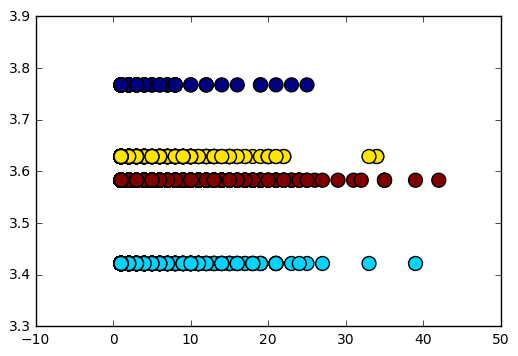

In [19]:
A = np.where(X2)[1]
plt.scatter(Y,predicts, c=A,s=100)